In [85]:
import pandas as pd

In [86]:
import numpy as np

In [87]:
column_names = ['user_id','item_id','rating,','timestamp'] #we know the columns so we entered manually
df = pd.read_csv(r'C:\Users\Laptop\Desktop\Refactored_Py_DS_ML_Bootcamp-master\19-Recommender-Systems\u.data',sep='\t',names=column_names)

In [88]:
df.head()

,user_id,item_id,"rating,",timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [89]:
movie_titles = pd.read_csv(r'C:\Users\Laptop\Desktop\Refactored_Py_DS_ML_Bootcamp-master\19-Recommender-Systems\Movie_Id_Titles') #read a csv about movie names

In [90]:
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [91]:
df = pd.merge(df,movie_titles,on='item_id')  #since the 2 data sets have item_id in common, we merge it on item_id

In [92]:
df.head()

,user_id,item_id,"rating,",timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
import seaborn as sns

In [95]:
sns.set_style('whitegrid')

In [96]:
df.groupby('title')['rating,'].mean().sort_values(ascending=False).head() #here we group data on the titles and find the means of reviews given and based on that we classify data on the basis of highest rating

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating,, dtype: float64

In [97]:
df.groupby('title')['rating,'].count().sort_values(ascending=False).head()


title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating,, dtype: int64

In [98]:
ratings = pd.DataFrame(df.groupby('title')['rating,'].mean())

In [99]:
ratings['no of ratings'] = pd.DataFrame(df.groupby('title')['rating,'].count())

In [100]:
ratings.head()

,"rating,",no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


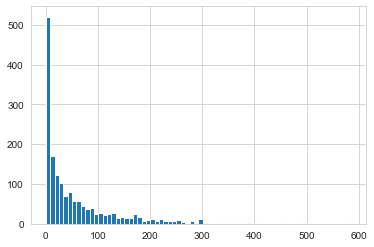

In [101]:
ratings['no of ratings'].hist(bins = 70)

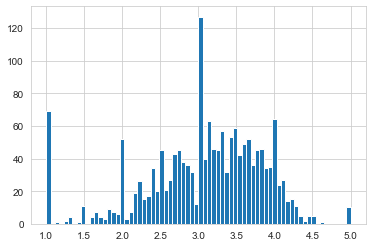

In [102]:
ratings['rating,'].hist(bins=70) #we can see that most of the reviewed movies have basically stars around 3

,user_id,item_id,"rating,",timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


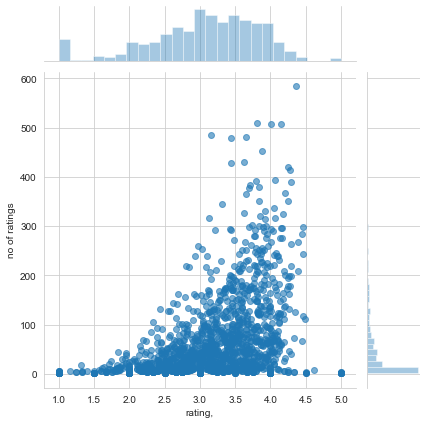

In [103]:
sns.jointplot(x='rating,',y='no of ratings',data=ratings,alpha=0.6)
df.head()

In [104]:
movie_mat = df.pivot_table(index='user_id',columns='title',values='rating,')

In [105]:
movie_mat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
ratings.sort_values('no of ratings',ascending = False)

,"rating,",no of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [108]:
starwars_movie_rating = movie_mat['Star Wars (1977)']
liarliar_movie_rating = movie_mat['Liar Liar (1997)']

In [109]:
similar_to_starwars = movie_mat.corrwith(starwars_movie_rating)
similar_to_liarliar = movie_mat.corrwith(liarliar_movie_rating)

C:\Users\Laptop\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Laptop\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [127]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [128]:
corr_starwars.sort_values('Correlation',ascending=False)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
...,...
For Ever Mozart (1996),-1.0
Frankie Starlight (1995),-1.0
I Like It Like That (1994),-1.0


In [129]:
corr_starwars=corr_starwars.join(ratings['no of ratings'])

In [130]:
corr_starwars.head()

,Correlation,no of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [131]:
corr_starwars.head()

,Correlation,no of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [132]:
corr_starwars[corr_starwars['no of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [133]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar.sort_values('Correlation',ascending=False)

,Correlation
title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0
...,...
Aparajito (1956),-1.0
"Quiet Room, The (1996)",-1.0
Germinal (1993),-1.0


In [134]:
corr_liarliar = corr_liarliar.join(ratings['no of ratings'])

In [136]:
corr_liarliar.head()

,Correlation,no of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [137]:
corr_liarliar[corr_liarliar['no of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,no of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
...,...,...
Hoop Dreams (1994),-0.184503,117
Ed Wood (1994),-0.199481,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,194
